In [1]:
from numpy import log, trunc
import config
from utils.origin_data_single import _DataFetcher
from PIL import Image
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
from config import RECONSTRUCTION_SAVE_PATH1

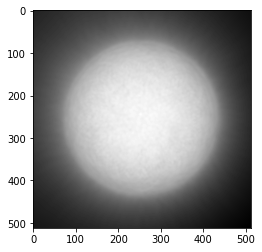

In [2]:
path = RECONSTRUCTION_SAVE_PATH1 + '//' + '1' + '.bmp'
ct_image = mpimg.imread(path)
plt.imshow(ct_image, cmap=plt.cm.gray)
plt.show()

In [3]:
path = config.FIXED_CT_PATH4
origin_data = _DataFetcher.create_data_fetcher(path)

80
Expecting:
 header_size: 88
 graph_size: 896000
 fields_size: 7168
 total: 903256
Receiving: 
 total: 903256


In [4]:
proj = origin_data.data_buff    # 投影数据
zA = origin_data.zero   # 暗场数据
mA = origin_data.full   # 亮场数据
nWidth = origin_data.header.p_Width
nHeight = origin_data.header.p_Height
pixel_len = origin_data.pixel_len   # 重建图像像素宽度
pixel_num = origin_data.pixel_num   # 重建图像分辨率
det_num = origin_data.det_config.det_num    #探测器数量
det2cen = origin_data.det_config.det2cen    # 射线源-旋转中心距离
det2src = origin_data.det_config.det2scr    # 射线源-探测器距离
cents = origin_data.det_config.cents    # 中心投影线序号
det_lar = origin_data.det_config.det_lar    # 探测器层数
det_width = origin_data.det_config.det_width    # 探测器宽度
FOV = pixel_len * pixel_num     # 视场
# 扇形束夹角

proj = proj.reshape((448, 1000))
proj = proj.astype(np.float)
'''
for i in range(0, 1000):
    proj[:, i] = (proj[:, i] - zA)/(mA - zA)
'''

'\nfor i in range(0, 1000):\n    proj[:, i] = (proj[:, i] - zA)/(mA - zA)\n'

In [5]:
max = proj.max()
min = proj.min()
proj_float = (proj - min) * 255 / (max - min)
proj_float = np.trunc(proj_float)
path = config.RECONSTRUCTION_SAVE_PATH1 + '//' + '00' + '.bmp'
output_img = Image.fromarray(proj_float)
output_img = output_img.convert('L')
output_img.save(path)